In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import cv2

In [4]:
import os

In [5]:
import tensorflow as tf

In [6]:
from tensorflow.keras.models import Sequential

In [7]:
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [8]:
path="C:/Users/ny691/OneDrive/Desktop/DATA SCIENCE NOTES/DATASETS/Deep Learning/CNN/Facial_Emotion/"

In [9]:
emlist=os.listdir("C:/Users/ny691/OneDrive/Desktop/DATA SCIENCE NOTES/DATASETS/Deep Learning/CNN/Facial_Emotion")

In [10]:
emlist


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [11]:
incol=[]
depen=[]
for n,i in enumerate(emlist):
    for e in os.listdir(path+i):
        img=cv2.imread(path+i+"/"+e)
        img=cv2.resize(img,(100,100))
        incol.append(img)
        depen.append(n)

In [12]:
len(incol)

28888

In [13]:
len(depen)

28888

In [14]:
inden_ary=np.array(incol)

In [15]:
depen_ary=np.array(depen)

### Scaling

In [16]:
inden_col_scale=inden_ary/255.0


In [17]:
X=inden_col_scale

In [18]:
y=depen_ary

In [19]:
X.shape

(28888, 100, 100, 3)

In [20]:
y.shape

(28888,)

### Splitting

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [23]:
X.shape,X_train.shape,X_test.shape

((28888, 100, 100, 3), (23110, 100, 100, 3), (5778, 100, 100, 3))

In [24]:
y.shape,y_train.shape,y_test.shape

((28888,), (23110,), (5778,))

### Model Building

In [25]:
smodel=Sequential()

In [26]:
smodel.add(Input(shape=(100,100,3)))

In [27]:
smodel.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))
           

In [28]:
smodel.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [29]:
smodel.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",strides=(1,1),padding="valid"))
smodel.add(MaxPooling2D(pool_size=(2,2),strides=2,padding="valid"))
smodel.add(Dropout(0.20))

In [30]:
smodel.add(Flatten())

In [31]:
smodel.add(Dense(256,activation="relu"))

In [32]:
smodel.add(Dense(128,activation="relu"))

In [33]:
smodel.add(Dense(64,activation="relu"))

In [34]:
smodel.add(Dense(32,activation="relu"))

In [35]:
smodel.add(Dense(7,activation="softmax"))

In [37]:
smodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 49, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 32)        0

In [38]:
smodel.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [39]:
smodel.fit(X_train,y_train,epochs=20)

Epoch 1/20
723/723 [==============================] - 149s 204ms/step - loss: 1.8922 - accuracy: 0.2055
Epoch 2/20
723/723 [==============================] - 147s 204ms/step - loss: 1.6494 - accuracy: 0.3531
Epoch 3/20
723/723 [==============================] - 144s 199ms/step - loss: 1.3829 - accuracy: 0.4579
Epoch 4/20
723/723 [==============================] - 143s 198ms/step - loss: 1.2090 - accuracy: 0.5260
Epoch 5/20
723/723 [==============================] - 145s 201ms/step - loss: 1.0801 - accuracy: 0.5717
Epoch 6/20
723/723 [==============================] - 145s 200ms/step - loss: 0.9791 - accuracy: 0.6148
Epoch 7/20
723/723 [==============================] - 149s 205ms/step - loss: 0.9020 - accuracy: 0.6457
Epoch 8/20
723/723 [==============================] - 144s 199ms/step - loss: 0.8242 - accuracy: 0.6793
Epoch 9/20
723/723 [==============================] - 147s 203ms/step - loss: 0.7594 - accuracy: 0.7057
Epoch 10/20
723/723 [==============================] - 144s 199m

In [40]:
smodel.evaluate(X_test,y_test)

181/181 [==============================] - 8s 44ms/step - loss: 1.5117 - accuracy: 0.6000


[1.5116925239562988, 0.6000345945358276]

In [41]:
X_train[2108]

array([[[0.20392157, 0.20392157, 0.20392157],
        [0.17254902, 0.17254902, 0.17254902],
        [0.10588235, 0.10588235, 0.10588235],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.04313725, 0.04313725, 0.04313725],
        [0.04313725, 0.04313725, 0.04313725]],

       [[0.2       , 0.2       , 0.2       ],
        [0.17254902, 0.17254902, 0.17254902],
        [0.10980392, 0.10980392, 0.10980392],
        ...,
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569],
        [0.03921569, 0.03921569, 0.03921569]],

       [[0.19215686, 0.19215686, 0.19215686],
        [0.16862745, 0.16862745, 0.16862745],
        [0.11372549, 0.11372549, 0.11372549],
        ...,
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412],
        [0.03529412, 0.03529412, 0.03529412]],

       ...,

       [[0.38039216, 0.38039216, 0.38039216],
        [0.38039216, 0.38039216, 0.38039216],
        [0.37647059, 0

In [42]:
img=X_train[2108].reshape((1,)+X_train[2108].shape)

In [43]:
smodel.predict(img)

1/1 [==============================] - 0s 162ms/step


array([[1.4613869e-09, 8.0530374e-12, 1.1812870e-08, 9.9999976e-01,
        2.2364775e-07, 3.5085612e-09, 8.1977625e-10]], dtype=float32)

In [44]:
np.argmax(smodel.predict(img))

1/1 [==============================] - 0s 55ms/step


3

In [50]:
emlist[3]

'happy'

In [46]:
y_train[2108]

3

In [48]:
import matplotlib.pyplot as plt

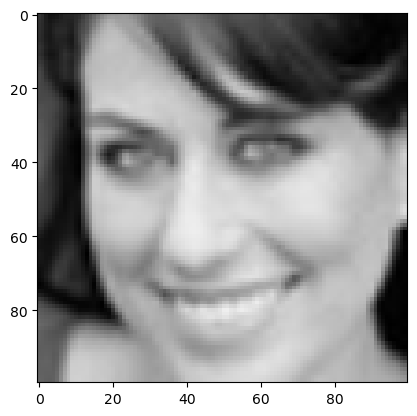

In [49]:
plt.imshow(X_train[2108])